In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import os
import random
import json
from tqdm import tqdm

In [2]:
# Define the autoencoder with increased complexity and regularization
def build_autoencoder(input_shape=(224, 224, 1)):
    input_img = Input(shape=input_shape)
    
    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.2)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.2)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.2)(x)
    
    # Decoder
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Dropout(0.2)(x)
    
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    return autoencoder

In [3]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 1)    │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,153 (5.07 MB)

 Trainable params: 1,329,153 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Set the random seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [5]:
# Load images function
def load_images(image_dir, num_images):
    image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]
    selected_paths = random.sample(image_paths, num_images)
    images = []

    for path in selected_paths:
        img = load_img(path, color_mode='grayscale', target_size=(224, 224))
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)

    images = np.array(images)
    return images

In [6]:
# Load and preprocess the normal and misbehavior images
normal_image_dir = "/Users/mohitkukreja/Desktop/TEA_Lab/data_side_lane/images"  
misbehavior_image_dir = "/Users/mohitkukreja/Desktop/TEA_Lab/data/images" 

# Load images
normal_images = load_images(normal_image_dir, 900)
misbehavior_images = load_images(misbehavior_image_dir, 100)

In [7]:
# Combine the normal and misbehavior images
images = np.concatenate((normal_images, misbehavior_images), axis=0)

In [8]:
# If necessary, reshape images to include the channel dimension
images = images.reshape((len(images), 224, 224, 1))

In [9]:
images

array([[[[0.3372549 ],
         [0.2901961 ],
         [0.24705882],
         ...,
         [0.54509807],
         [0.54901963],
         [0.5647059 ]],

        [[0.3254902 ],
         [0.28627452],
         [0.25882354],
         ...,
         [0.5411765 ],
         [0.54901963],
         [0.5647059 ]],

        [[0.30588236],
         [0.28235295],
         [0.27450982],
         ...,
         [0.54509807],
         [0.5529412 ],
         [0.57254905]],

        ...,

        [[0.22352941],
         [0.2       ],
         [0.21568628],
         ...,
         [0.3647059 ],
         [0.44313726],
         [0.4392157 ]],

        [[0.2       ],
         [0.20392157],
         [0.20784314],
         ...,
         [0.34509805],
         [0.43529412],
         [0.43529412]],

        [[0.17254902],
         [0.21176471],
         [0.22352941],
         ...,
         [0.33333334],
         [0.42352942],
         [0.43137255]]],


       [[[0.28235295],
         [0.28627452],
         [0.29

In [10]:
# Calculate augmentation loss function
def calculate_augmentation_loss(model, normal_images, batch_size=100):
    sampled_indices = np.random.choice(len(normal_images), batch_size, replace=False)
    sampled_images = normal_images[sampled_indices]
    reconstructed_images = model.predict(sampled_images)
    augmentation_loss = np.mean(np.square(sampled_images - reconstructed_images), axis=(1, 2, 3))
    return np.mean(augmentation_loss)

In [11]:
# Training parameters
epochs = 20
batch_size = 32
augmentation_batch_size = 100

In [12]:
for epoch in range(epochs):
    # Shuffle and split data into batches
    np.random.shuffle(images)
    num_batches = len(images) // batch_size
    
    total_loss = 0
    for i in tqdm(range(num_batches)):
        batch = images[i * batch_size: (i + 1) * batch_size]
        history = autoencoder.fit(batch, batch, epochs=1, batch_size=batch_size, shuffle=True, verbose=0)
        total_loss += history.history['loss'][0]
    
    # Calculate the augmentation loss and add to total loss
    augmentation_loss = calculate_augmentation_loss(autoencoder, normal_images, augmentation_batch_size)
    total_loss += augmentation_loss
    
    print(f'Epoch {epoch + 1}/{epochs}, Total Loss: {total_loss / num_batches}')

100%|███████████████████████████████████████████| 31/31 [01:59<00:00,  3.86s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 673ms/step
Epoch 1/20, Total Loss: 0.6817709486330709


100%|███████████████████████████████████████████| 31/31 [02:00<00:00,  3.89s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step
Epoch 2/20, Total Loss: 0.6562217728745553


100%|███████████████████████████████████████████| 31/31 [02:08<00:00,  4.16s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step 
Epoch 3/20, Total Loss: 0.6538996210982723


100%|███████████████████████████████████████████| 31/31 [02:07<00:00,  4.11s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step
Epoch 4/20, Total Loss: 0.652933444827795


100%|███████████████████████████████████████████| 31/31 [02:08<00:00,  4.15s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 667ms/step
Epoch 5/20, Total Loss: 0.6523808560544445


100%|███████████████████████████████████████████| 31/31 [02:17<00:00,  4.43s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step
Epoch 6/20, Total Loss: 0.652077901387407


100%|███████████████████████████████████████████| 31/31 [03:43<00:00,  7.22s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step
Epoch 7/20, Total Loss: 0.6517948708346775


100%|███████████████████████████████████████████| 31/31 [02:47<00:00,  5.40s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step
Epoch 8/20, Total Loss: 0.6515777096632989


100%|███████████████████████████████████████████| 31/31 [02:04<00:00,  4.01s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step
Epoch 9/20, Total Loss: 0.6513617264046785


100%|███████████████████████████████████████████| 31/31 [02:05<00:00,  4.04s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 645ms/step
Epoch 10/20, Total Loss: 0.6512762967256769


100%|███████████████████████████████████████████| 31/31 [02:05<00:00,  4.06s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step
Epoch 11/20, Total Loss: 0.6510851243811269


100%|███████████████████████████████████████████| 31/31 [02:05<00:00,  4.06s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 645ms/step
Epoch 12/20, Total Loss: 0.6510110510693442


100%|███████████████████████████████████████████| 31/31 [08:13<00:00, 15.92s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step
Epoch 13/20, Total Loss: 0.6509239354561414


100%|███████████████████████████████████████████| 31/31 [09:30<00:00, 18.41s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step
Epoch 14/20, Total Loss: 0.6507434199053433


100%|███████████████████████████████████████████| 31/31 [02:02<00:00,  3.95s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 637ms/step
Epoch 15/20, Total Loss: 0.6506887415964757


100%|███████████████████████████████████████████| 31/31 [02:02<00:00,  3.96s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 659ms/step
Epoch 16/20, Total Loss: 0.6507075382697005


100%|███████████████████████████████████████████| 31/31 [02:10<00:00,  4.22s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 644ms/step
Epoch 17/20, Total Loss: 0.6505736914733725


100%|███████████████████████████████████████████| 31/31 [02:18<00:00,  4.47s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 652ms/step
Epoch 18/20, Total Loss: 0.6504956308391786


100%|███████████████████████████████████████████| 31/31 [02:31<00:00,  4.87s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step
Epoch 19/20, Total Loss: 0.6504877692749423


100%|███████████████████████████████████████████| 31/31 [02:09<00:00,  4.17s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step
Epoch 20/20, Total Loss: 0.6504573186919573


In [13]:
# Evaluate model
reconstructed_images = autoencoder.predict(images)
reconstruction_errors = np.mean(np.square(images - reconstructed_images), axis=(1, 2, 3))

32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 910ms/step


In [14]:
# Get indices of the top 100 high MSE images
top_100_indices = np.argsort(reconstruction_errors)[-100:]

In [15]:
# Check how many of the top 100 high MSE images are misbehavior images
num_misbehavior_in_top_100 = sum(idx >= 900 for idx in top_100_indices)
print(f"Number of misbehavior images in the top 100 high MSE images: {num_misbehavior_in_top_100}")

Number of misbehavior images in the top 100 high MSE images: 15


In [16]:
# Visualization function
def display_images(images, reconstructed_images, reconstruction_errors, indices, num_images=10):
    plt.figure(figsize=(20, 4))
    for i, idx in enumerate(indices[:num_images]):
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(images[idx].reshape(224, 224), cmap='gray')
        plt.title(f"Original\nMSE: {reconstruction_errors[idx]:.4f}")
        plt.axis("off")
        
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[idx].reshape(224, 224), cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()


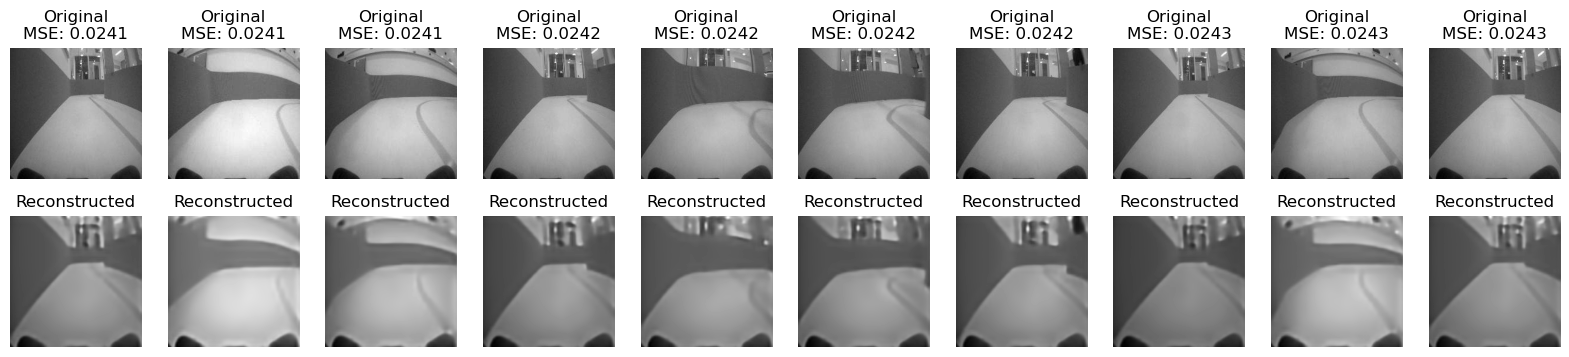

In [17]:
# Display sample images from the top 100 high MSE images
display_images(images, reconstructed_images, reconstruction_errors, top_100_indices, num_images=10)

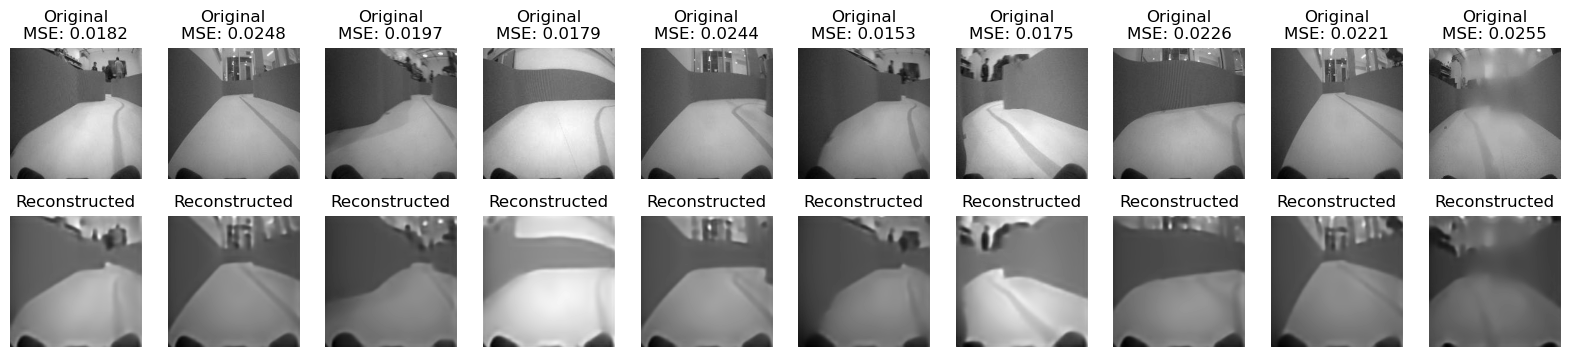

In [18]:
# Display sample images from random images
random_indices = np.random.choice(len(images), 10, replace=False)
display_images(images, reconstructed_images, reconstruction_errors, random_indices, num_images=10)